<a href="https://colab.research.google.com/github/harleeliz/harleeliz/blob/main/Errors_and_Normality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Errors and Normality Example using Linear Regression - Normally distributed data

In [ ]:
"""
	•	matplotlib: A library for creating static, animated, and interactive visualizations in Python.
	•	numpy: A library for numerical computing with arrays and matrices.
	•	statsmodels: A library for statistical models, which includes linear regression, time series analysis, and more.
"""

"""
!pip install numpy
!pip install matplotlib
!pip install statsmodels # Install necessary modules
"""


import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
import statsmodels.api as sm

 #This line sets the default figure size for plots created using Matplotlib to be 20x10 inches. This is useful for ensuring that plots are larger and easier to read.
matplotlib.rcParams['figure.figsize'] = (20, 10)

"""
The function linear_data_generator1, generates linear data with added noise.

Parameters:
	•	m: Slope of the linear function.
	•	b: Intercept of the linear function.
	•	range: A tuple specifying the range of x-values (e.g., (0, 10)).
	•	N: Number of data points.
	•	seed: Seed value for reproducibility of random number generation.


Steps:
	1.	Creates a random number generator using seed.
	2.	Generates random values sample from a uniform distribution in the given range.
	3.	Calculates ys, the linear function based on the sample, slope m, and intercept b.
	4.	Adds normally distributed random noise to ys to simulate imperfect data.
"""

def linear_data_generator1(m, b, range, N, seed):
    rng = numpy.random.default_rng(seed=seed)
    sample = rng.uniform(low=range[0], high=range[1], size=N)
    ys = m * sample + b
    noise = rng.normal(loc=0., scale=3, size=N)
    return (sample, ys + noise)


"""
Function linear_data_generator2
	•	Purpose: Similar to linear_data_generator1, this function generates noisy linear data.
	•	Main difference: Instead of just multiplying m by the sample, it uses numpy.dot(), which is useful for multidimensional arrays or matrix multiplication.

"""


def linear_data_generator2(m, b, range, N, seed):
    rng = numpy.random.default_rng(seed=seed)
    sample = rng.uniform(low=range[0], high=range[1], size=N)
    ys = numpy.dot(sample,numpy.reshape(m,(-1,1))) + b
    noise = rng.normal(loc=0., scale=5, size=ys.shape)
    return (numpy.transpose(sample), ys + noise)

def linear_data_generator3(m, b, range, N, seed):
    rng = numpy.random.default_rng(seed=seed)
    sample = rng.uniform(low=range[0], high=range[1], size=N)
    ys = numpy.exp(m * sample) + b
    noise = rng.normal(loc=0., scale=3, size=N)
    return (sample, ys + noise)

"""
Function linear_model
	•	Purpose: This function computes the coefficients of a linear model using the Singular Value Decomposition (SVD) method.
	•	Steps:
	1.	Creates a column vector ones of the same length as ys filled with 1s.
	2.	Reshapes xs into a 2D array if it’s a 1D array.
	3.	Constructs matrix A by horizontally stacking ones and xs, forming a matrix used for the linear equation.
	4.	Performs SVD on matrix A (i.e., decomposes A into three matrices: u, s, and vT).
	5.	Calculates the pseudo-inverse of A using the matrices from SVD.
	6.	Multiplies the pseudo-inverse by ys to get the coefficients of the linear model (coefs).
"""


def nonlinear_data_generator1(m,b,range,N,seed):
    ones = numpy.reshape(numpy.ones_like(ys), (-1, 1))
    if len(xs.shape) == 1:
        xs = numpy.reshape(xs, (-1, 1))
    A = numpy.hstack((ones, xs))
    u, s, vT = numpy.linalg.svd(A)
    u = u[:, :A.shape[1]]
    s_inv = numpy.diag(numpy.power(s, -1))
    uT = numpy.transpose(u)
    v = numpy.transpose(vT)
    pinv = numpy.dot(v, numpy.dot(s_inv, uT))
    coefs = numpy.dot(pinv, ys)
    return coefs

"""
  def linear_model(xs,ys):
    ones=numpy.reshape(numpy.ones_like(ys,(-1,1)))
    if len(xs.shape)==1:
      xs=numpy.reshape(xs,(-1,1))
    A=numpy.hstack((ones,xs))
    u,s,vT=numpy.linalg.svd(A)
    u=u[:,:A.shape[1]]
    s_inv=numpy.diag(numpy.power(s,-1))
    uT=numpy.transpose(u)
    v=numpy.transpose(vT)
    pinv=numpy.dot(v,numpy.dot(s_inv,uT))
    coefs=numpy.dot(pinv,ys)
  """

'\n  def linear_model(xs,ys):\n    ones=numpy.reshape(numpy.ones_like(ys,(-1,1)))\n    if len(xs.shape)==1:\n      xs=numpy.reshape(xs,(-1,1))  \n    A=numpy.hstack((ones,xs))\n    u,s,vT=numpy.linalg.svd(A)\n    u=u[:,:A.shape[1]]\n    s_inv=numpy.diag(numpy.power(s,-1))\n    uT=numpy.transpose(u)\n    v=numpy.transpose(vT)\n    pinv=numpy.dot(v,numpy.dot(s_inv,uT))\n    coefs=numpy.dot(pinv,ys)                                                                                                                                          \n  '

# A Linear One-Dimensional Example

In [ ]:
xs,ys= linear_data_generator1(3,-1,[-10,10],1000,8675309)

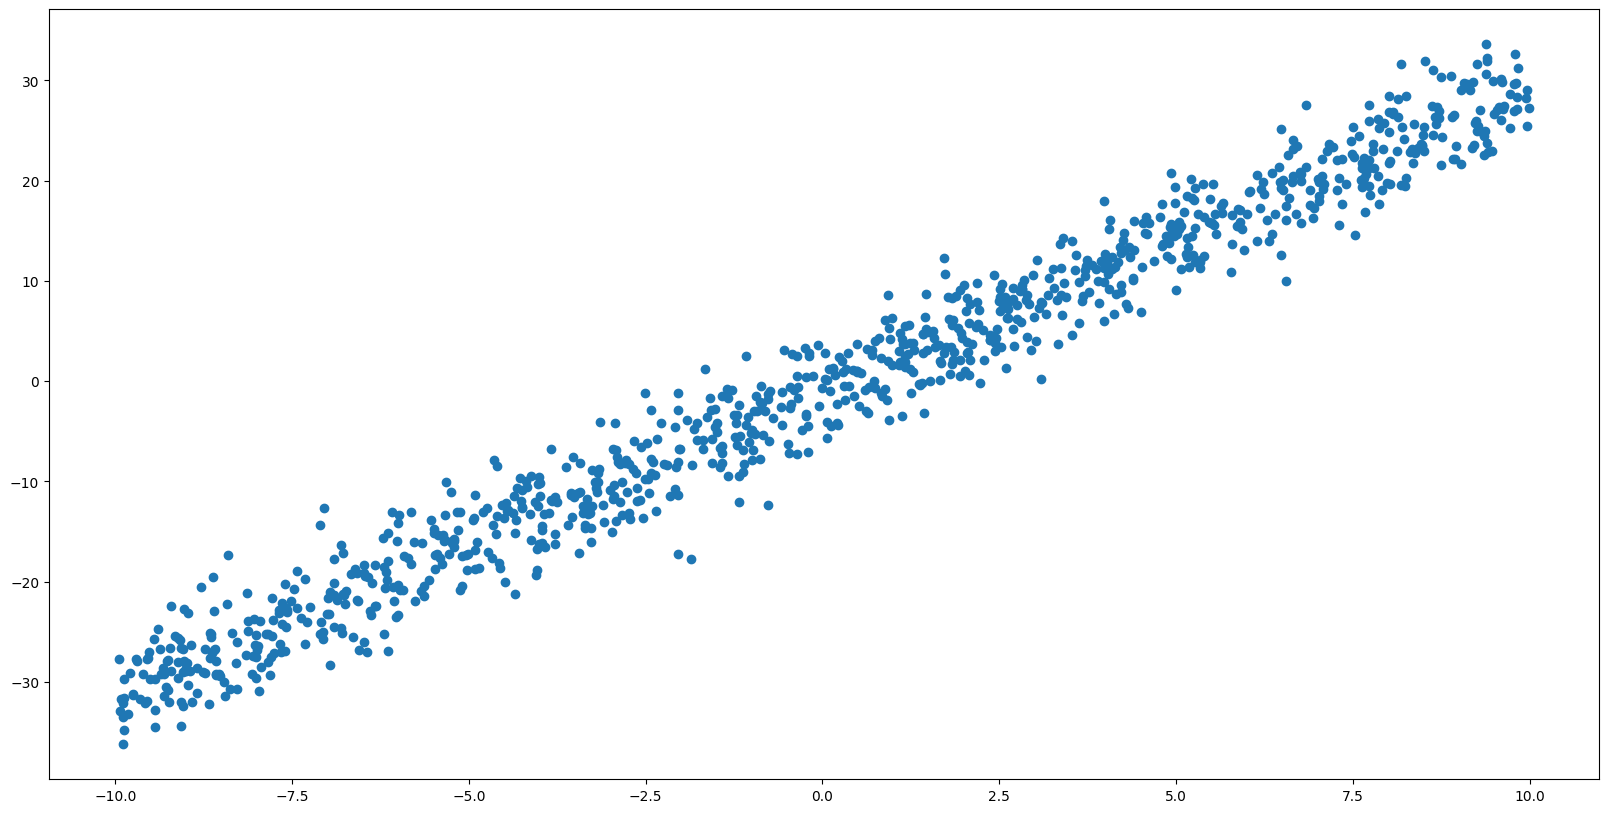

In [ ]:
plt.scatter(x=xs,y=ys)

In [ ]:
"""
Notes:
	•	coefs = linear_model(xs, ys): Finds the best-fit slope and intercept for the linear model using the given data (xs and ys).
	•	predictions = coefs[0] + xs * coefs[1]: Uses the coefficients (slope and intercept) to predict ys values for each xs.
	•	errors = ys - predictions: Calculates the difference (residuals) between the actual ys values and the predicted values, which shows how well the model fits the data.
These lines are essential in linear regression for understanding both the model (coefficients) and the model’s accuracy (how much the predictions deviate from the actual values).
"""
coefs=linear_model(xs,ys)
predictions =coefs[0]+xs*coefs[1]
errors=ys-predictions

In [ ]:
coefs

array([-1.03445336,  3.02624198])

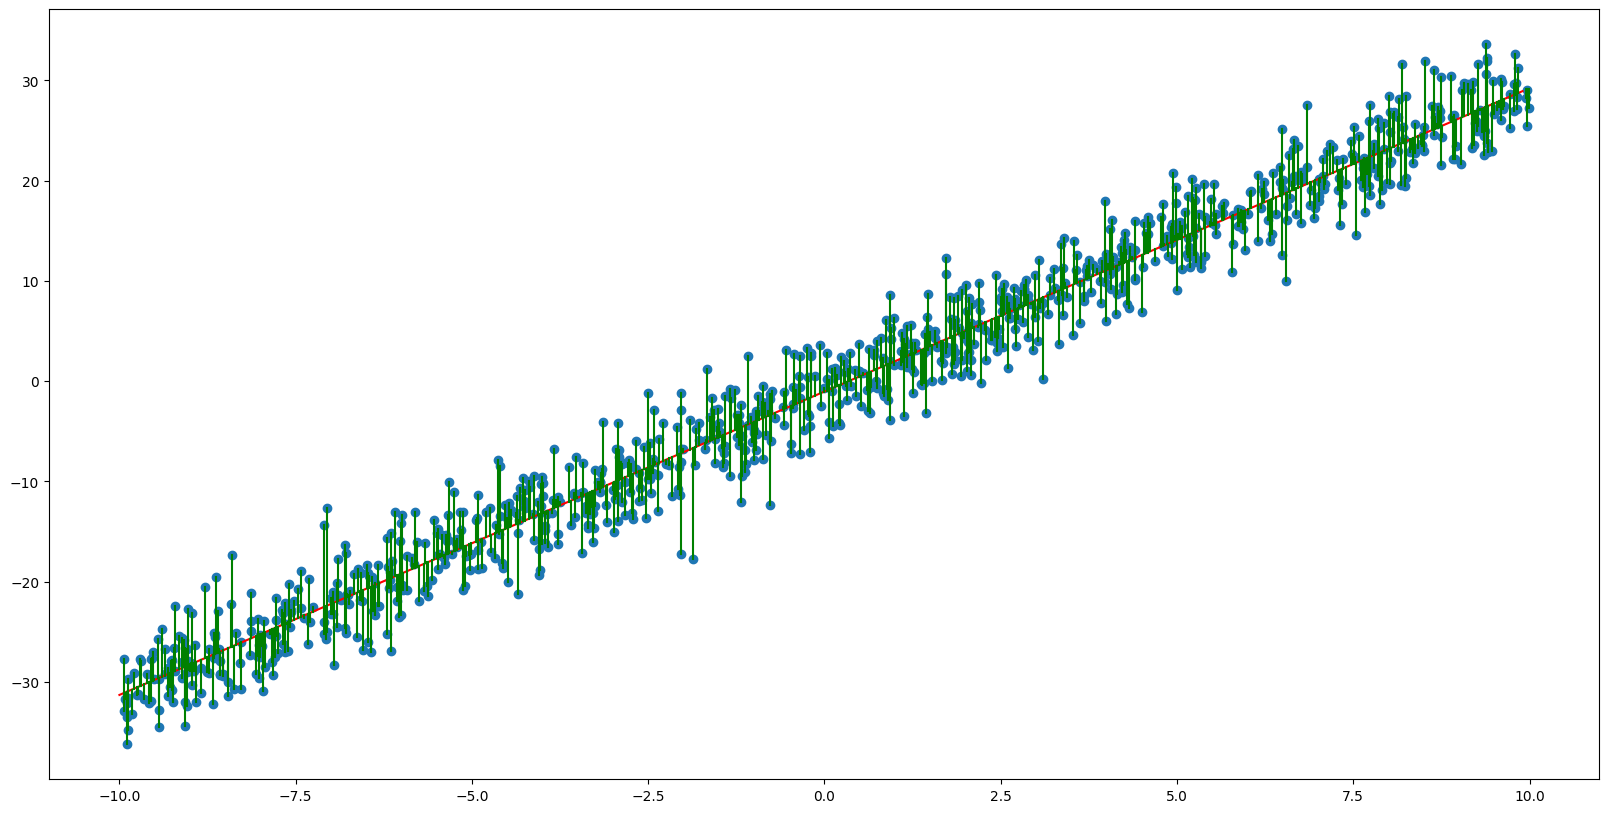

In [ ]:
"""
Notes:
	•	The scatter plot (plt.scatter(x=xs, y=ys)): Shows the raw data points that have been generated (including noise).
	•	The red regression line (plt.plot(range, coefs[0] + range * coefs[1], color='red')): Represents the model’s prediction of the relationship between xs and ys.
	•	The green lines (plt.plot([x, x], [y, p], color='green')): Highlight the differences (residuals) between the actual data points (ys) and the predicted data points (predictions).
   These lines give a visual representation of how well the model fits the data.
"""
range =numpy.arange(-10,10,0.1)
plt.scatter(x=xs, y=ys)
plt.plot(range, coefs[0]+range*coefs[1],color='red')
for x, y, p in zip(xs,ys,predictions):
  plt.plot([x,x],[y,p],color='green')
plt.show()

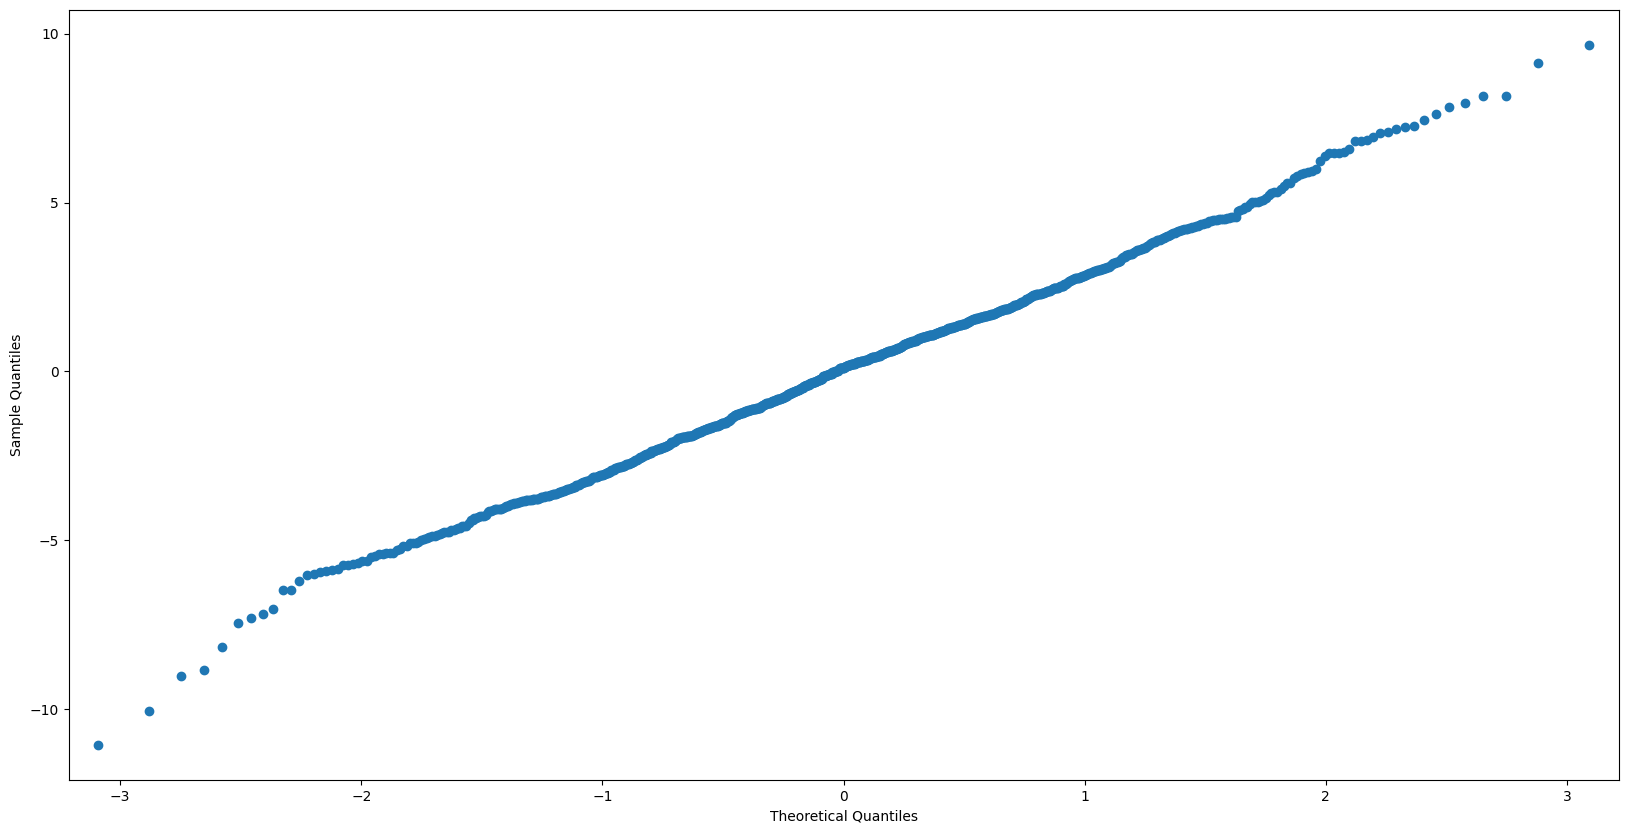

In [ ]:
"""
Quartiles from the normal distribution
Normal distributed data

Integers are normally distributed
This means we should get a better model for the data
"""

sm.qqplot(errors)
plt.show()

# Some non-linear data

In [ ]:
xs,ys = nonlinear_data_generator1(0.8,3,[-3,3],1000,8675309)

UnboundLocalError: local variable 'xs' referenced before assignment

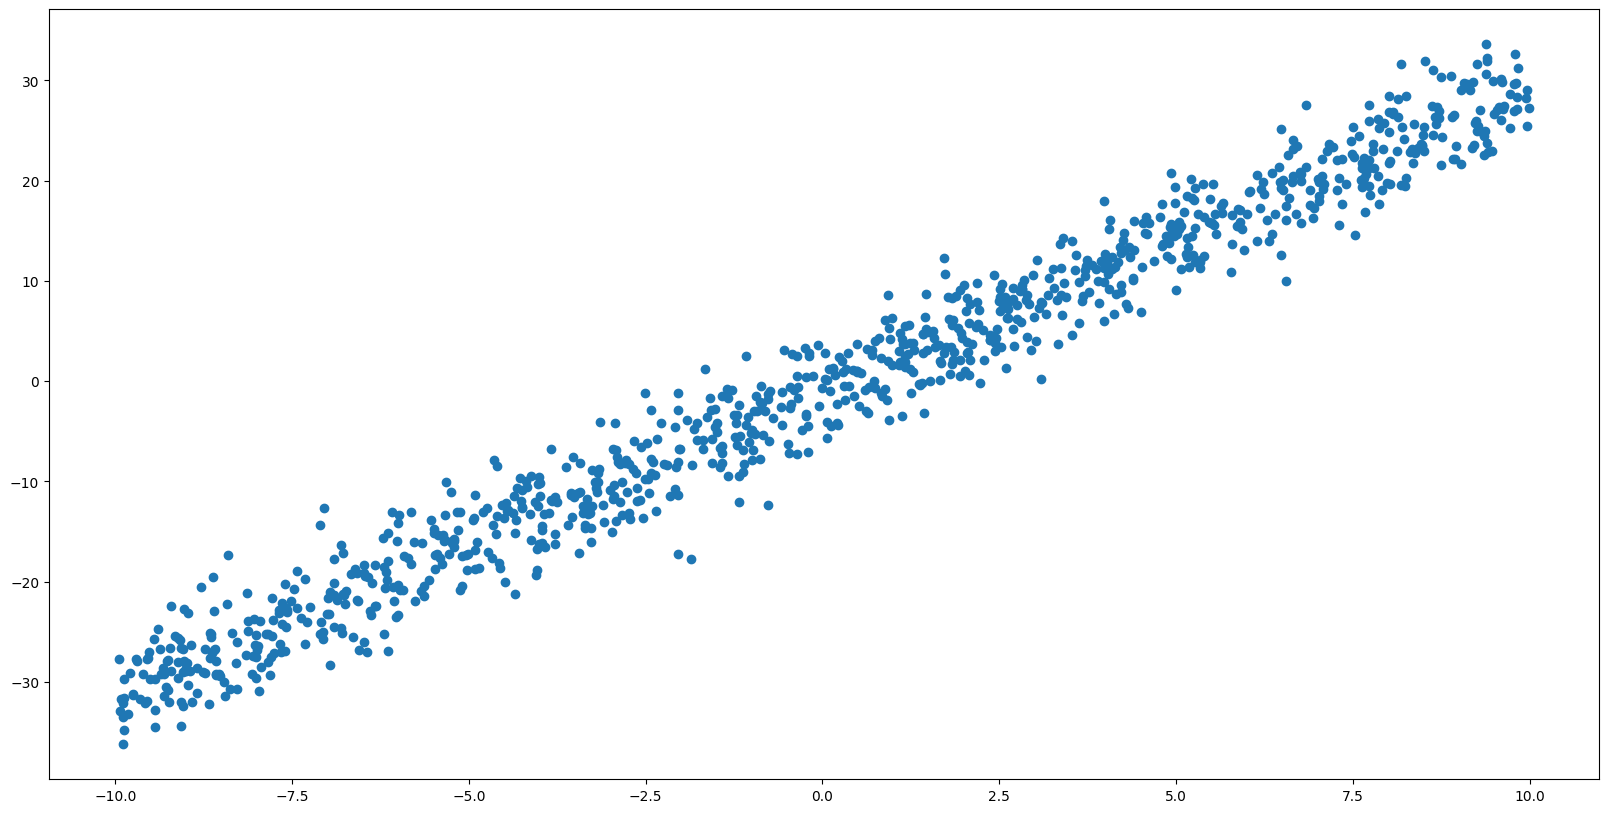

In [ ]:
plt.scatter(xs,ys)

In [ ]:
coefs=linear_model(xs,ys)
predictions=coefs[0]+xs*coefs[1]
errors=ys-predictions

In [ ]:
range=numpy.arrange
plt.scatter(x=xs,y=ys)
plt.plot(range,coefs[0]+range*coefs)

# Up in Dimension

In [ ]:
m=numpy.array([3.1,-2.5,1.4,-4.7])
xs, ys= linear_data_generator2(m,2.2,[-10,10],[4,1000],seed=8675309)

In [ ]:
coefs=linear_model(xs,ys)


In [ ]:
coefs

array([-1.03445336,  3.02624198])

In [ ]:
preds=coefs[0]+numpy.dot(xs,numpy.reshape(coefs[1:],(-1,1)))
erros=ys-numpy.reshape(preds,(-1))


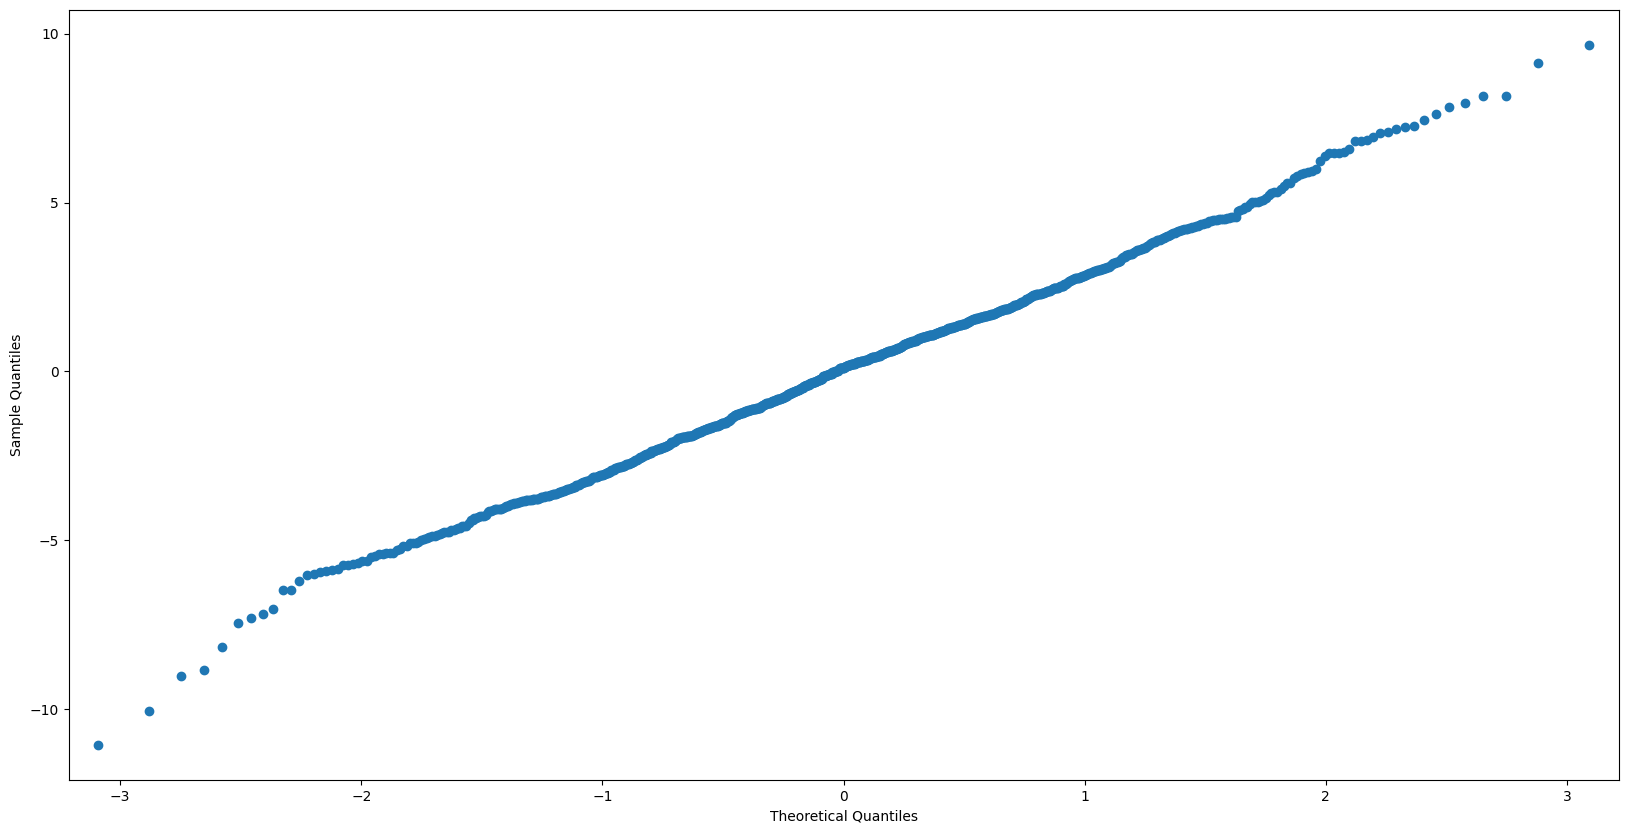

In [ ]:
sm.qqplot(errors)
plt.show()

AttributeError: module 'statsmodels.api' has no attribute 'gplot'